In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
df = pd.read_csv('./laptop_price.csv', encoding = 'latin-1')
df.sample(6)

,laptop_ID,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
988,1002,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.0
188,192,Acer,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 7Y54 1.2GHz,8GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.12kg,989.0
807,816,HP,Notebook,15.6,1366x768,AMD A12-Series 9700P 2.5GHz,8GB,2TB HDD,AMD Radeon R7 Graphics,Windows 10,2.04kg,629.0
164,168,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.1kg,348.0
696,704,Lenovo,2 in 1 Convertible,14.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.38kg,1749.0
511,518,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,4GB,500GB HDD,Nvidia GeForce 940MX,Windows 10,2.2kg,639.0


In [43]:
df.shape

(1303, 12)

This dataset contain 13 columns and 1303 rows.




In [44]:
df.duplicated().sum()

0

There are no duplicate values in this dataset.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


This dataset contain laptop_ID column. No need this column.




In [46]:
df.drop(columns = 'laptop_ID', axis = 1, inplace = True)
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
982,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,549.0
884,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0
999,HP,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.48kg,2089.0


In [47]:
df.shape

(1303, 11)

In [48]:
df.describe()

,Inches,Price_euros
count,1303.000000,1303.000000
mean,15.017191,1123.686992
std,1.426304,699.009043
min,10.100000,174.000000
25%,14.000000,599.000000
50%,15.600000,977.000000
75%,15.600000,1487.880000
max,18.400000,6099.000000


'Company' column.

In [49]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

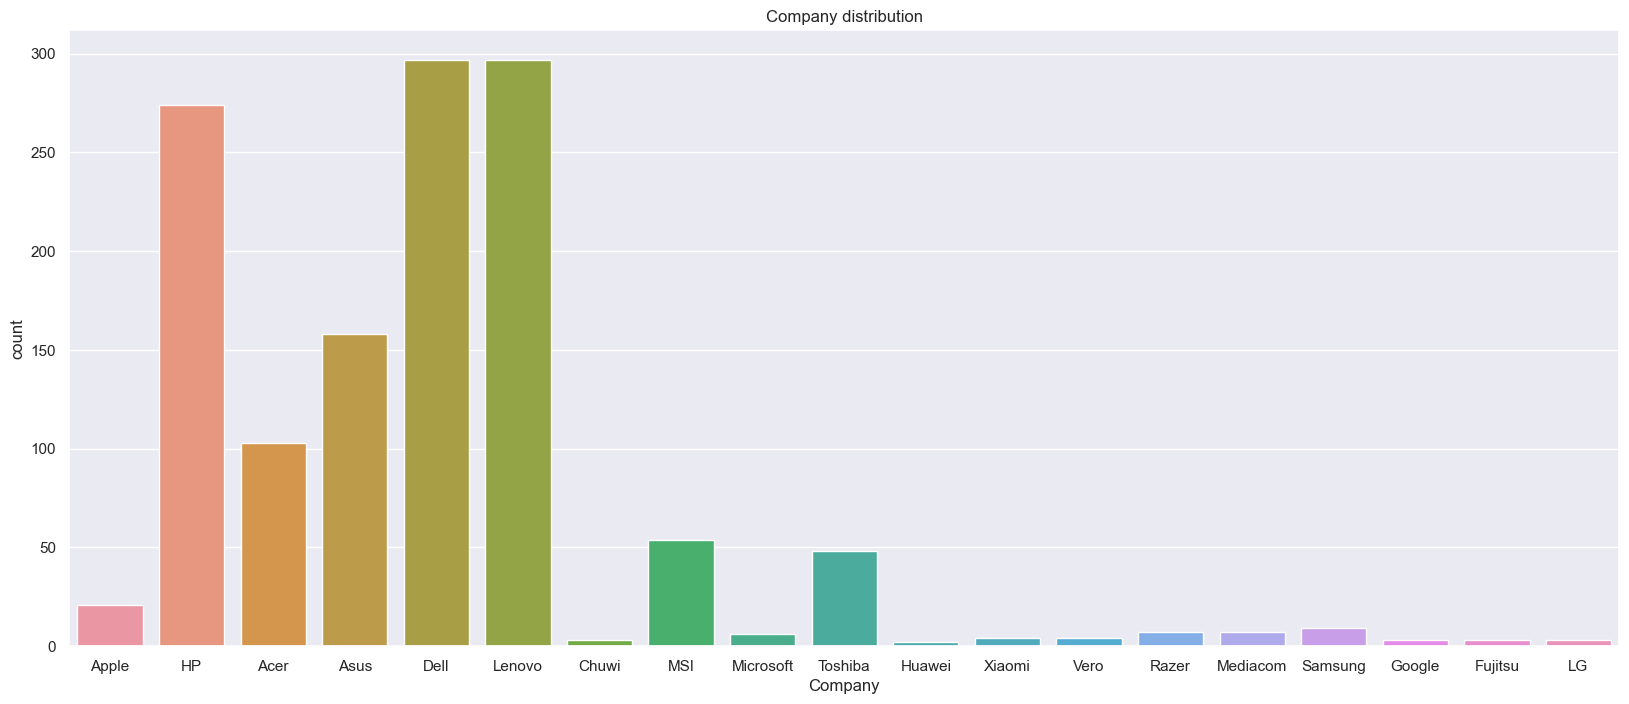

In [50]:
sns.set()
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Company', data = df)
plt.title('Company distribution')
plt.show()

'TypeName' column.

In [51]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

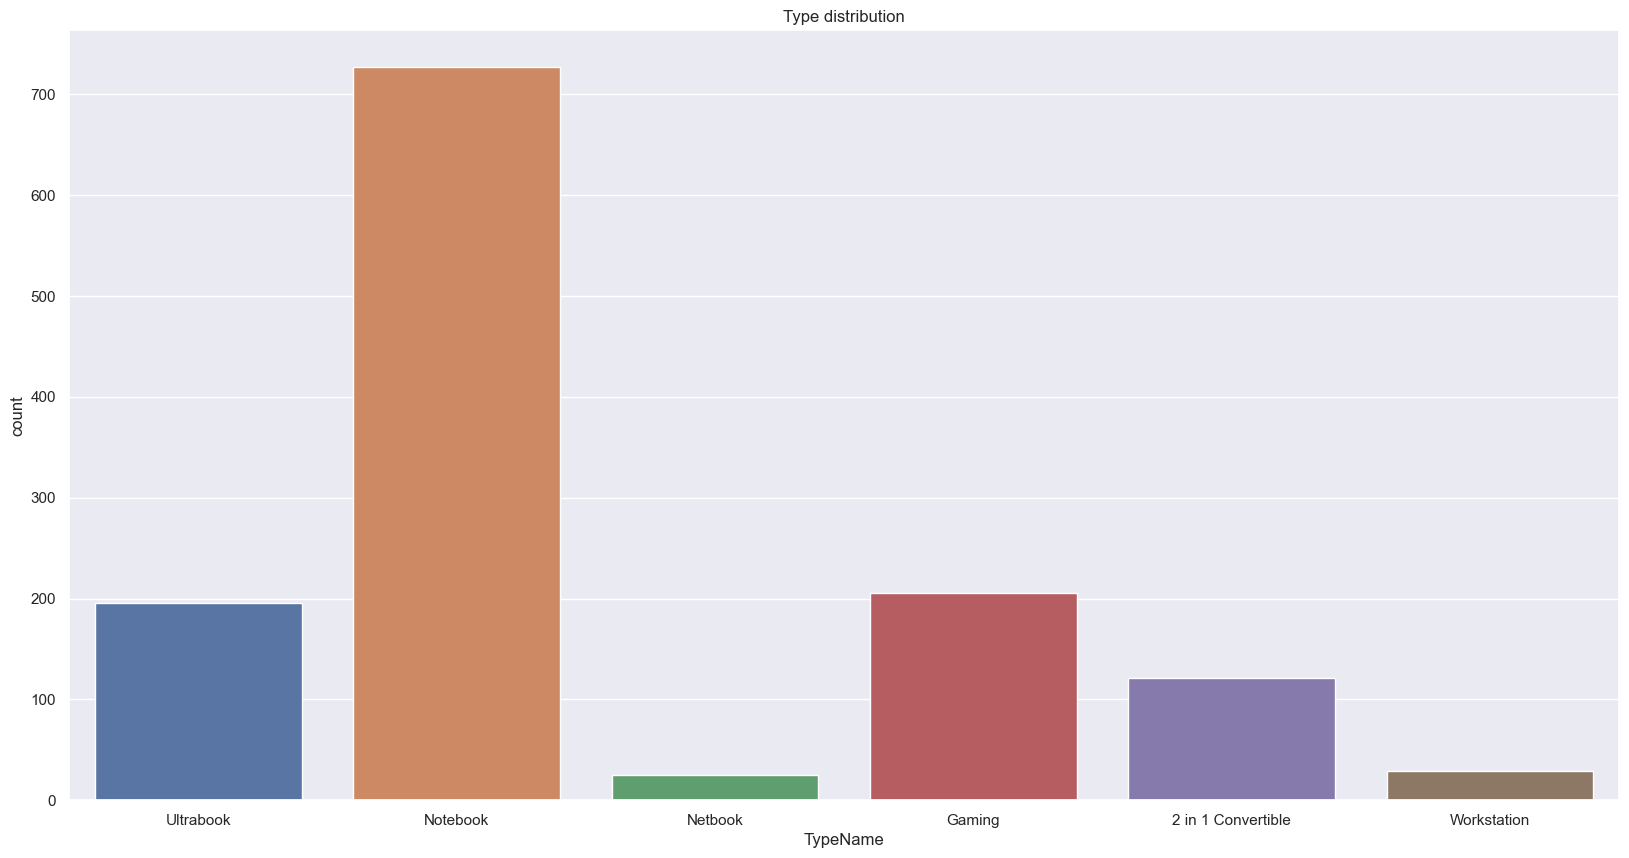

In [52]:
sns.set()
plt.figure(figsize = (20, 10))
sns.countplot(x = 'TypeName', data = df)
plt.title('Type distribution')
plt.show()

'Inches' column.

In [53]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

<Figure size 2000x6000 with 0 Axes>

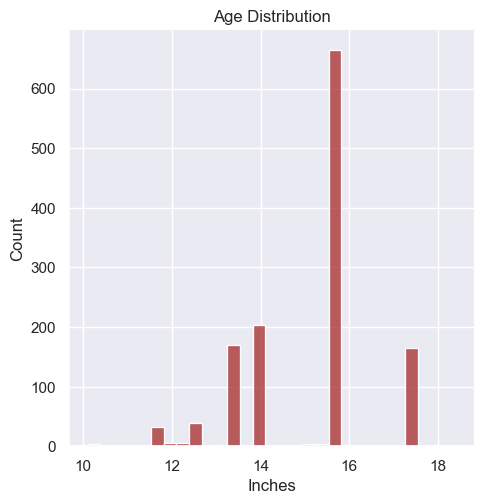

In [54]:
sns.set()
plt.figure(figsize = (20, 60))
sns.displot(df.Inches, color = 'brown')
plt.title('Age Distribution')
plt.show()

'ScreenResolution' column.

In [55]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [56]:
sns.set()
plt.figure(figsize = (200, 60))
sns.countplot(x = 'ScreenResolution', data = df)
plt.title('Screen resolution distribution')
plt.show()

'Cpu' column.

In [57]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [58]:
sns.set()
plt.figure(figsize = (200, 50))
sns.countplot(x = 'Cpu', data = df)
plt.title('Cpu')
plt.show()

'Ram' column.

In [59]:
df['Ram'].value_counts()

8GB     619
4GB     375
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

In [60]:
df.replace({'Ram' : {'2GB' : '2', '4GB' : '4', '6GB' : '6','8GB' : '8','12GB' : '12','16GB' : '16', '24GB' : '24','32GB' : '32', '64GB' : '64'}},inplace = True)
df['Ram'].value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

In [61]:
df['Ram'] = df['Ram'].astype('int')

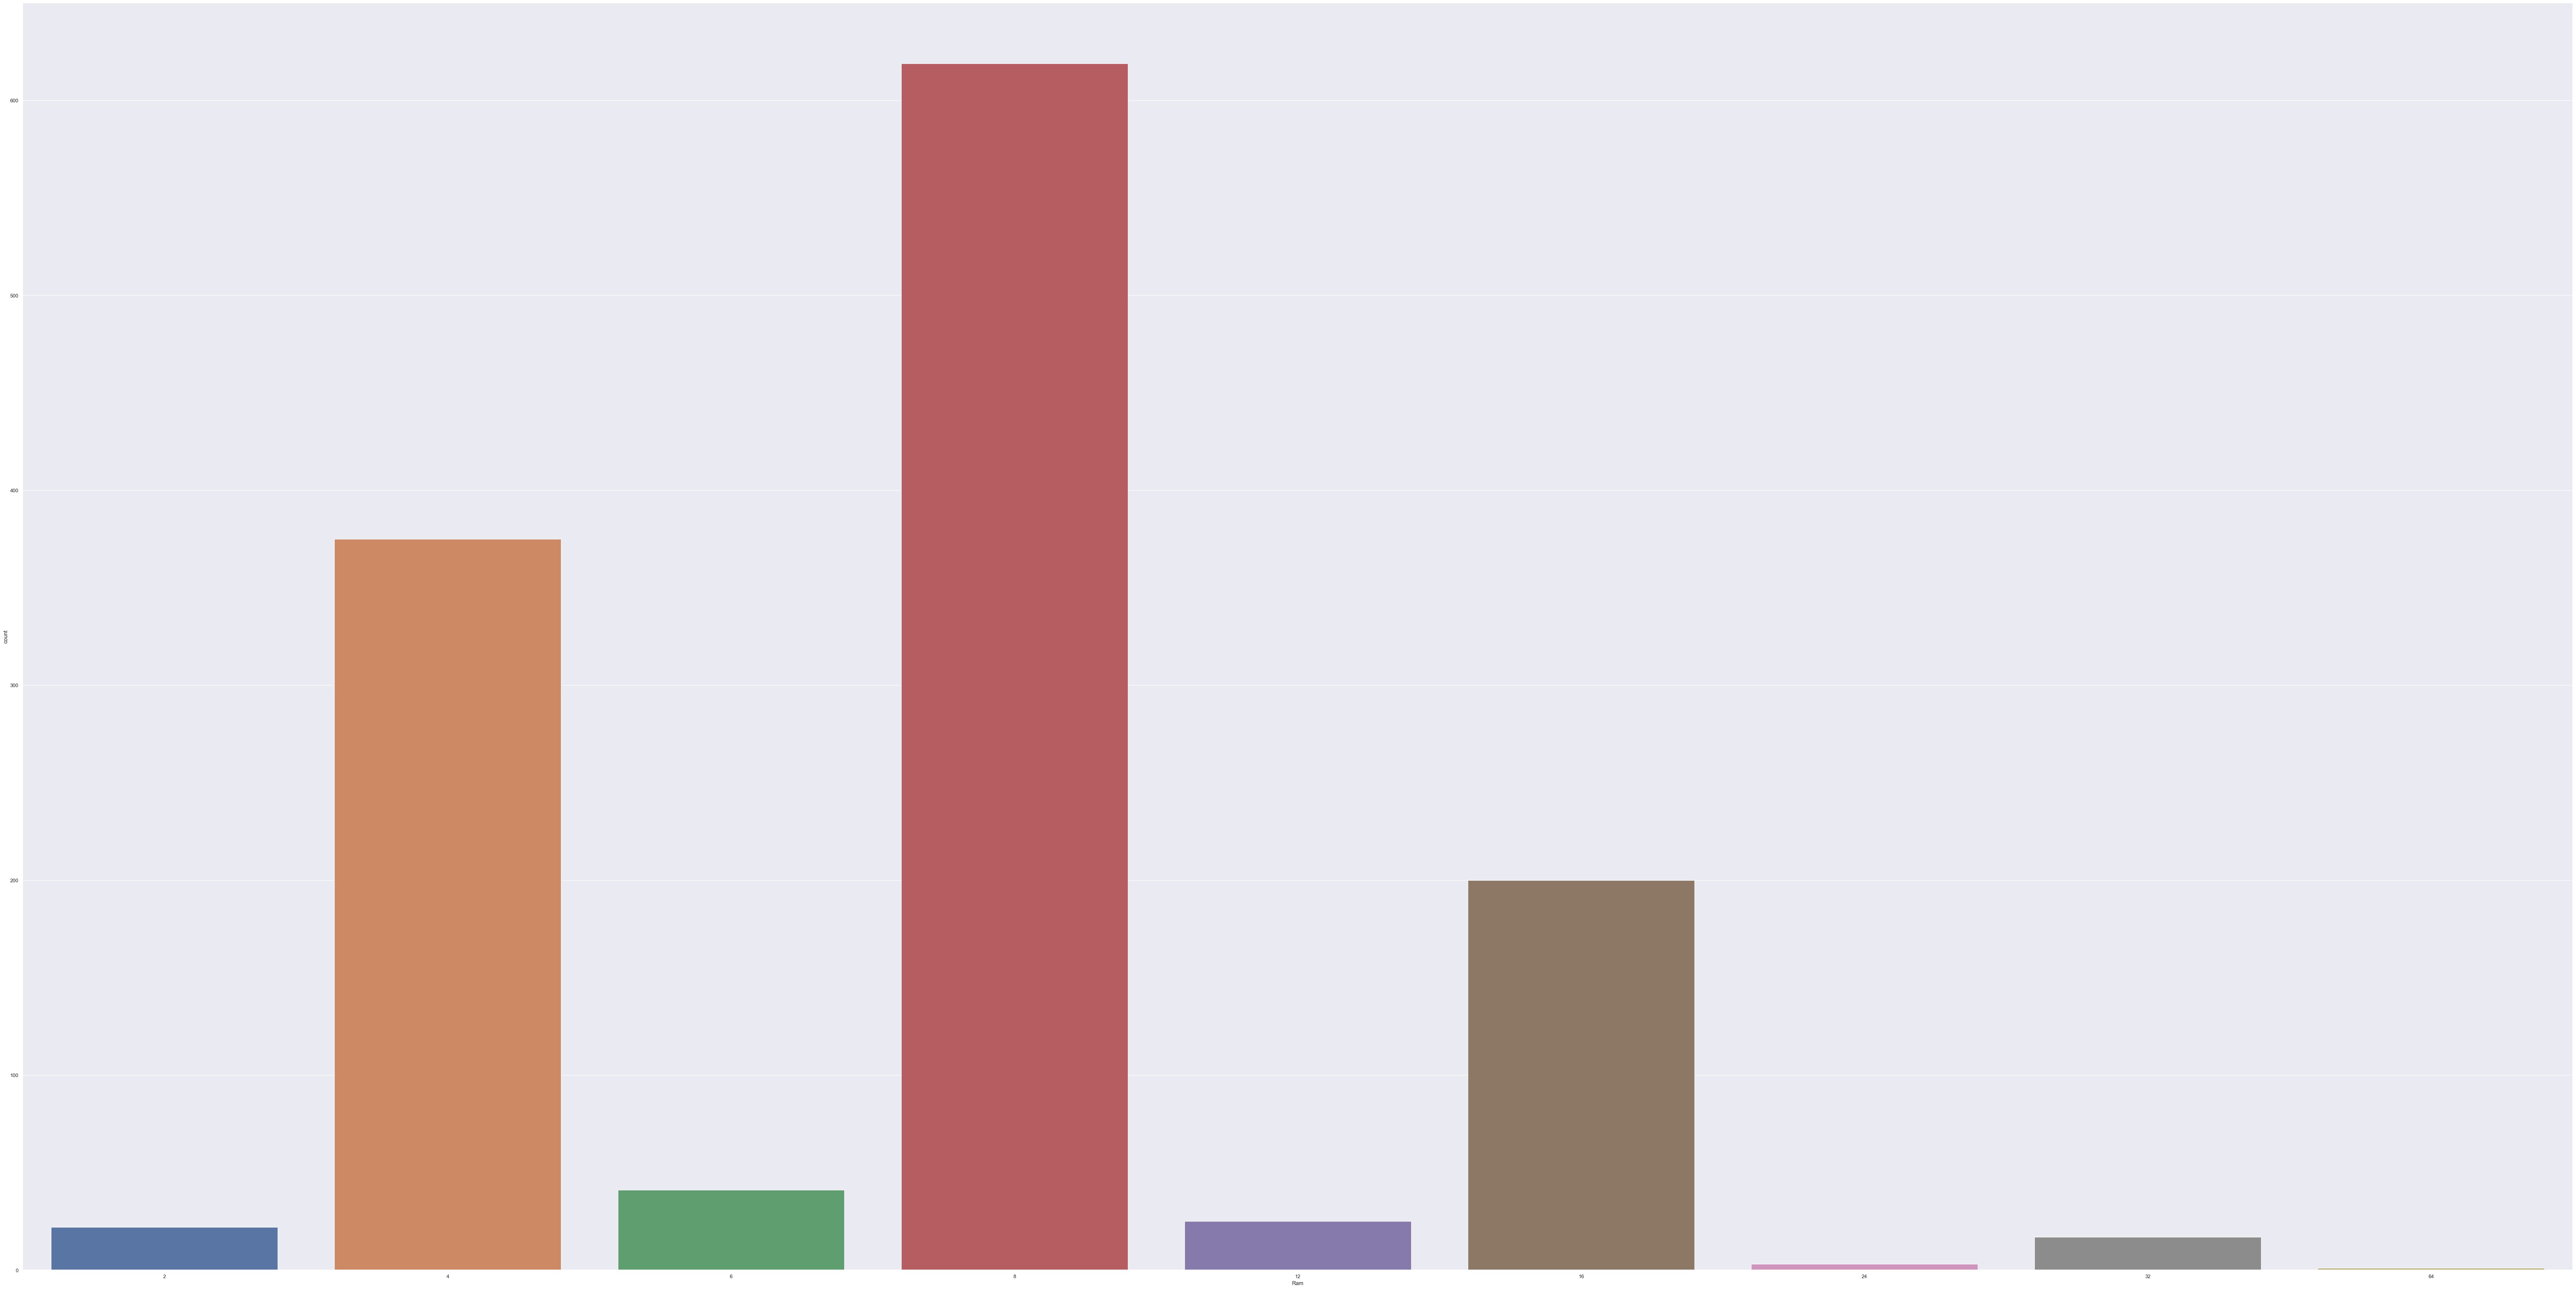

In [62]:
sns.set()
plt.figure(figsize = (100, 50))
sns.countplot(x = 'Ram', data = df)
plt.show()

'Memory' column

In [63]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [64]:
df['Memory'] = df['Memory'].str.replace('1.0', '1')

C:\Users\pinil\AppData\Local\Temp\ipykernel_4412\1379554861.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory'] = df['Memory'].str.replace('1.0', '1')


In [65]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          224
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1TB Hybrid                         9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [66]:
df['first'] = df['Memory'].str.split('+', expand = True)[0]
df['second'] = df['Memory'].str.split('+', expand = True)[1]
df.drop(columns = 'Memory', axis = 1, inplace = True)
df['first'].fillna('0', inplace = True)
df['second'].fillna('0', inplace = True)
df.sample(6)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,first,second
271,Asus,Gaming,17.3,Full HD 1920x1080,AMD Ryzen 1700 3GHz,16,AMD Radeon RX 580,Windows 10,3.2kg,1549.0,256GB SSD,1TB HDD
368,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,AMD Radeon R7 M445,Windows 10,2.33kg,899.0,256GB SSD,0
1171,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,Intel UHD Graphics 620,Windows 10,2.1kg,1159.0,512GB SSD,0
431,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,Intel HD Graphics 620,Windows 10,1.4kg,1010.0,256GB SSD,0
708,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,Intel HD Graphics 520,Windows 10,1.8kg,1191.0,256GB SSD,0
1218,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.6kg,1272.0,128GB SSD,1TB HDD


In [78]:
df['first'].value_counts()

256GB SSD              412
1TB HDD                224
500GB HDD              132
512GB SSD              118
128GB SSD               96
256GB SSD               88
128GB SSD               76
32GB Flash Storage      38
512GB SSD               20
2TB HDD                 16
64GB Flash Storage      15
1TB SSD                 14
1TB Hybrid               9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
1GB SSD                  5
128GB Flash Storage      4
16GB SSD                 3
1TB SSD                  2
512GB Flash Storage      2
64GB SSD                 1
64GB Flash Storage       1
1TB HDD                  1
32GB HDD                 1
128GB HDD                1
240GB SSD                1
8GB SSD                  1
508GB Hybrid             1
Name: first, dtype: int64

In [77]:
df['primary'] = df['first'].str.split(' ', expand = True)[0]
df['secondary'] = df['first'].str.split(' ', expand = True)[1]
df['2'] = df['first'].str.split(' ', expand = True)[2]
df['3'] = df['first'].str.split(' ', expand = True)[3]

In [81]:
print(df['primary'].value_counts())
print("------------------------------------------------")
print(df['secondary'].value_counts())
print("------------------------------------------------")
print(df['2'].value_counts())
print("------------------------------------------------")
print(df['3'].value_counts())

256GB    508
1TB      250
128GB    177
512GB    140
500GB    132
32GB      45
64GB      17
2TB       16
16GB      10
1GB        5
240GB      1
8GB        1
508GB      1
Name: primary, dtype: int64
-----------------------------
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: secondary, dtype: int64
-----------------------------
           207
Storage     75
Name: 2, dtype: int64
-----------------------------
    1
Name: 3, dtype: int64


In [83]:
df['primaryMemory'] = df['primary'] + ' ' + df['secondary']
df['primaryMemory'].value_counts()

256GB SSD       500
1TB HDD         225
128GB SSD       172
512GB SSD       138
500GB HDD       132
32GB Flash       38
64GB Flash       16
2TB HDD          16
1TB SSD          16
1TB Hybrid        9
256GB Flash       8
16GB Flash        7
32GB SSD          6
1GB SSD           5
128GB Flash       4
16GB SSD          3
512GB Flash       2
240GB SSD         1
8GB SSD           1
64GB SSD          1
128GB HDD         1
32GB HDD          1
508GB Hybrid      1
Name: primaryMemory, dtype: int64

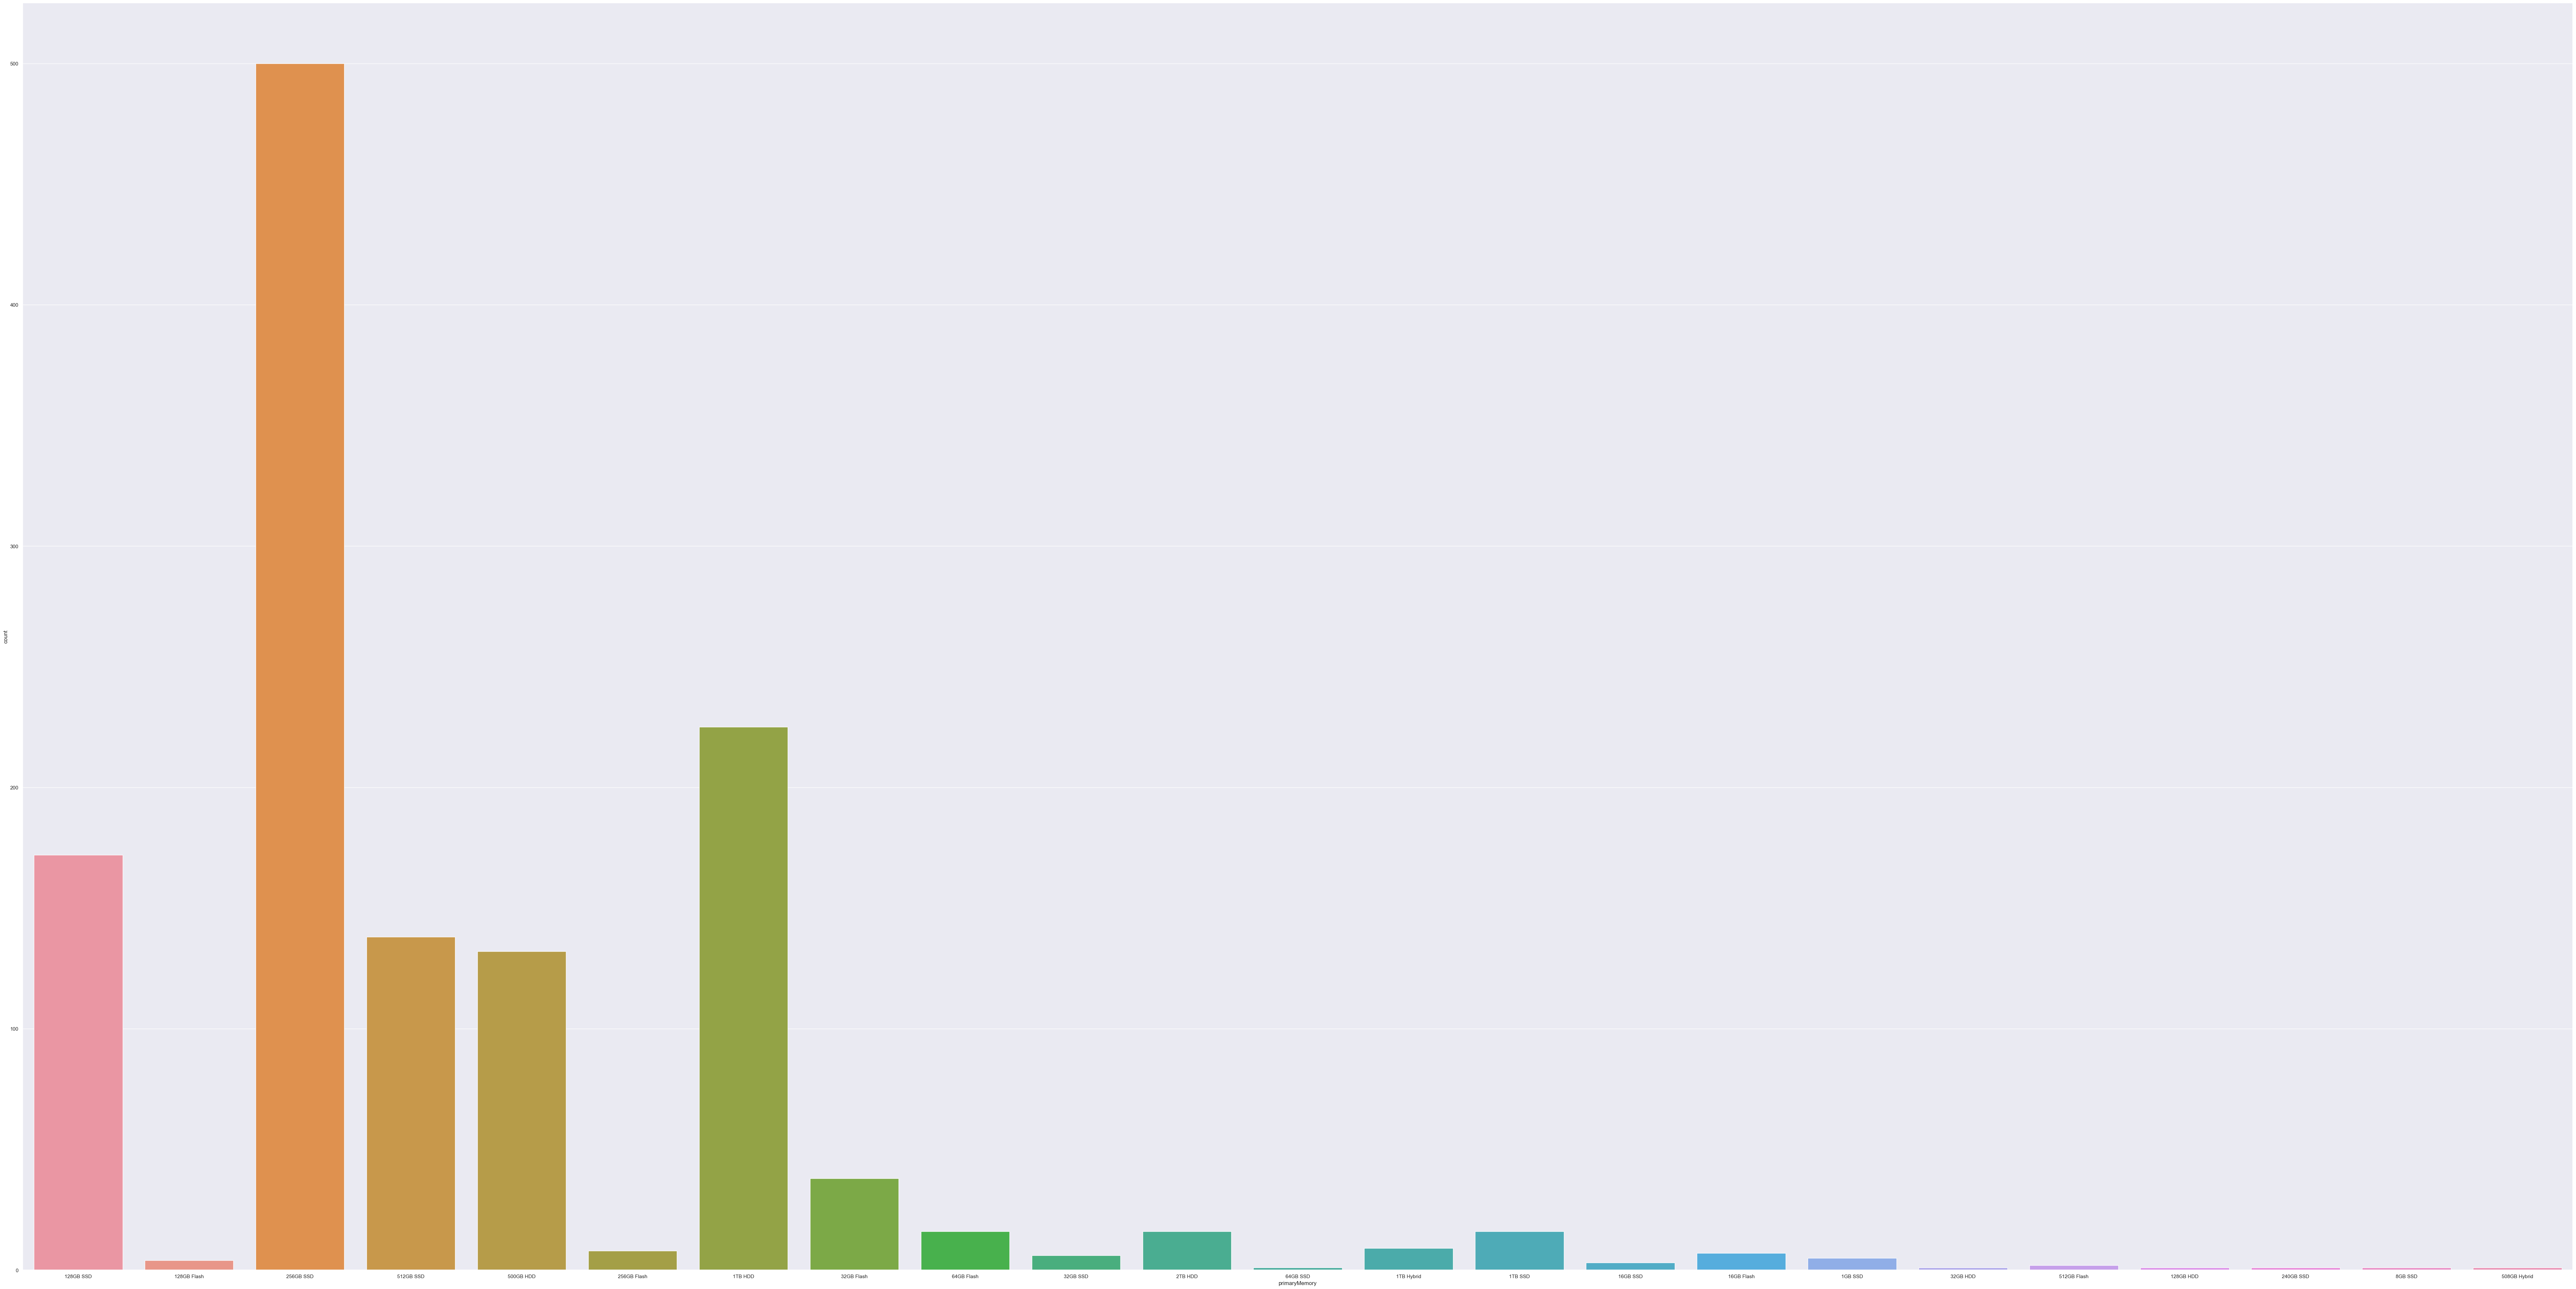

In [84]:
sns.set()
plt.figure(figsize = (100, 50))
sns.countplot(x = 'primaryMemory', data = df)
plt.show()

In [69]:
df['second'].value_counts()

0               1095
  1TB HDD        185
  2TB HDD         15
  256GB SSD        3
  500GB HDD        2
  1TB Hybrid       2
  512GB SSD        1
Name: second, dtype: int64

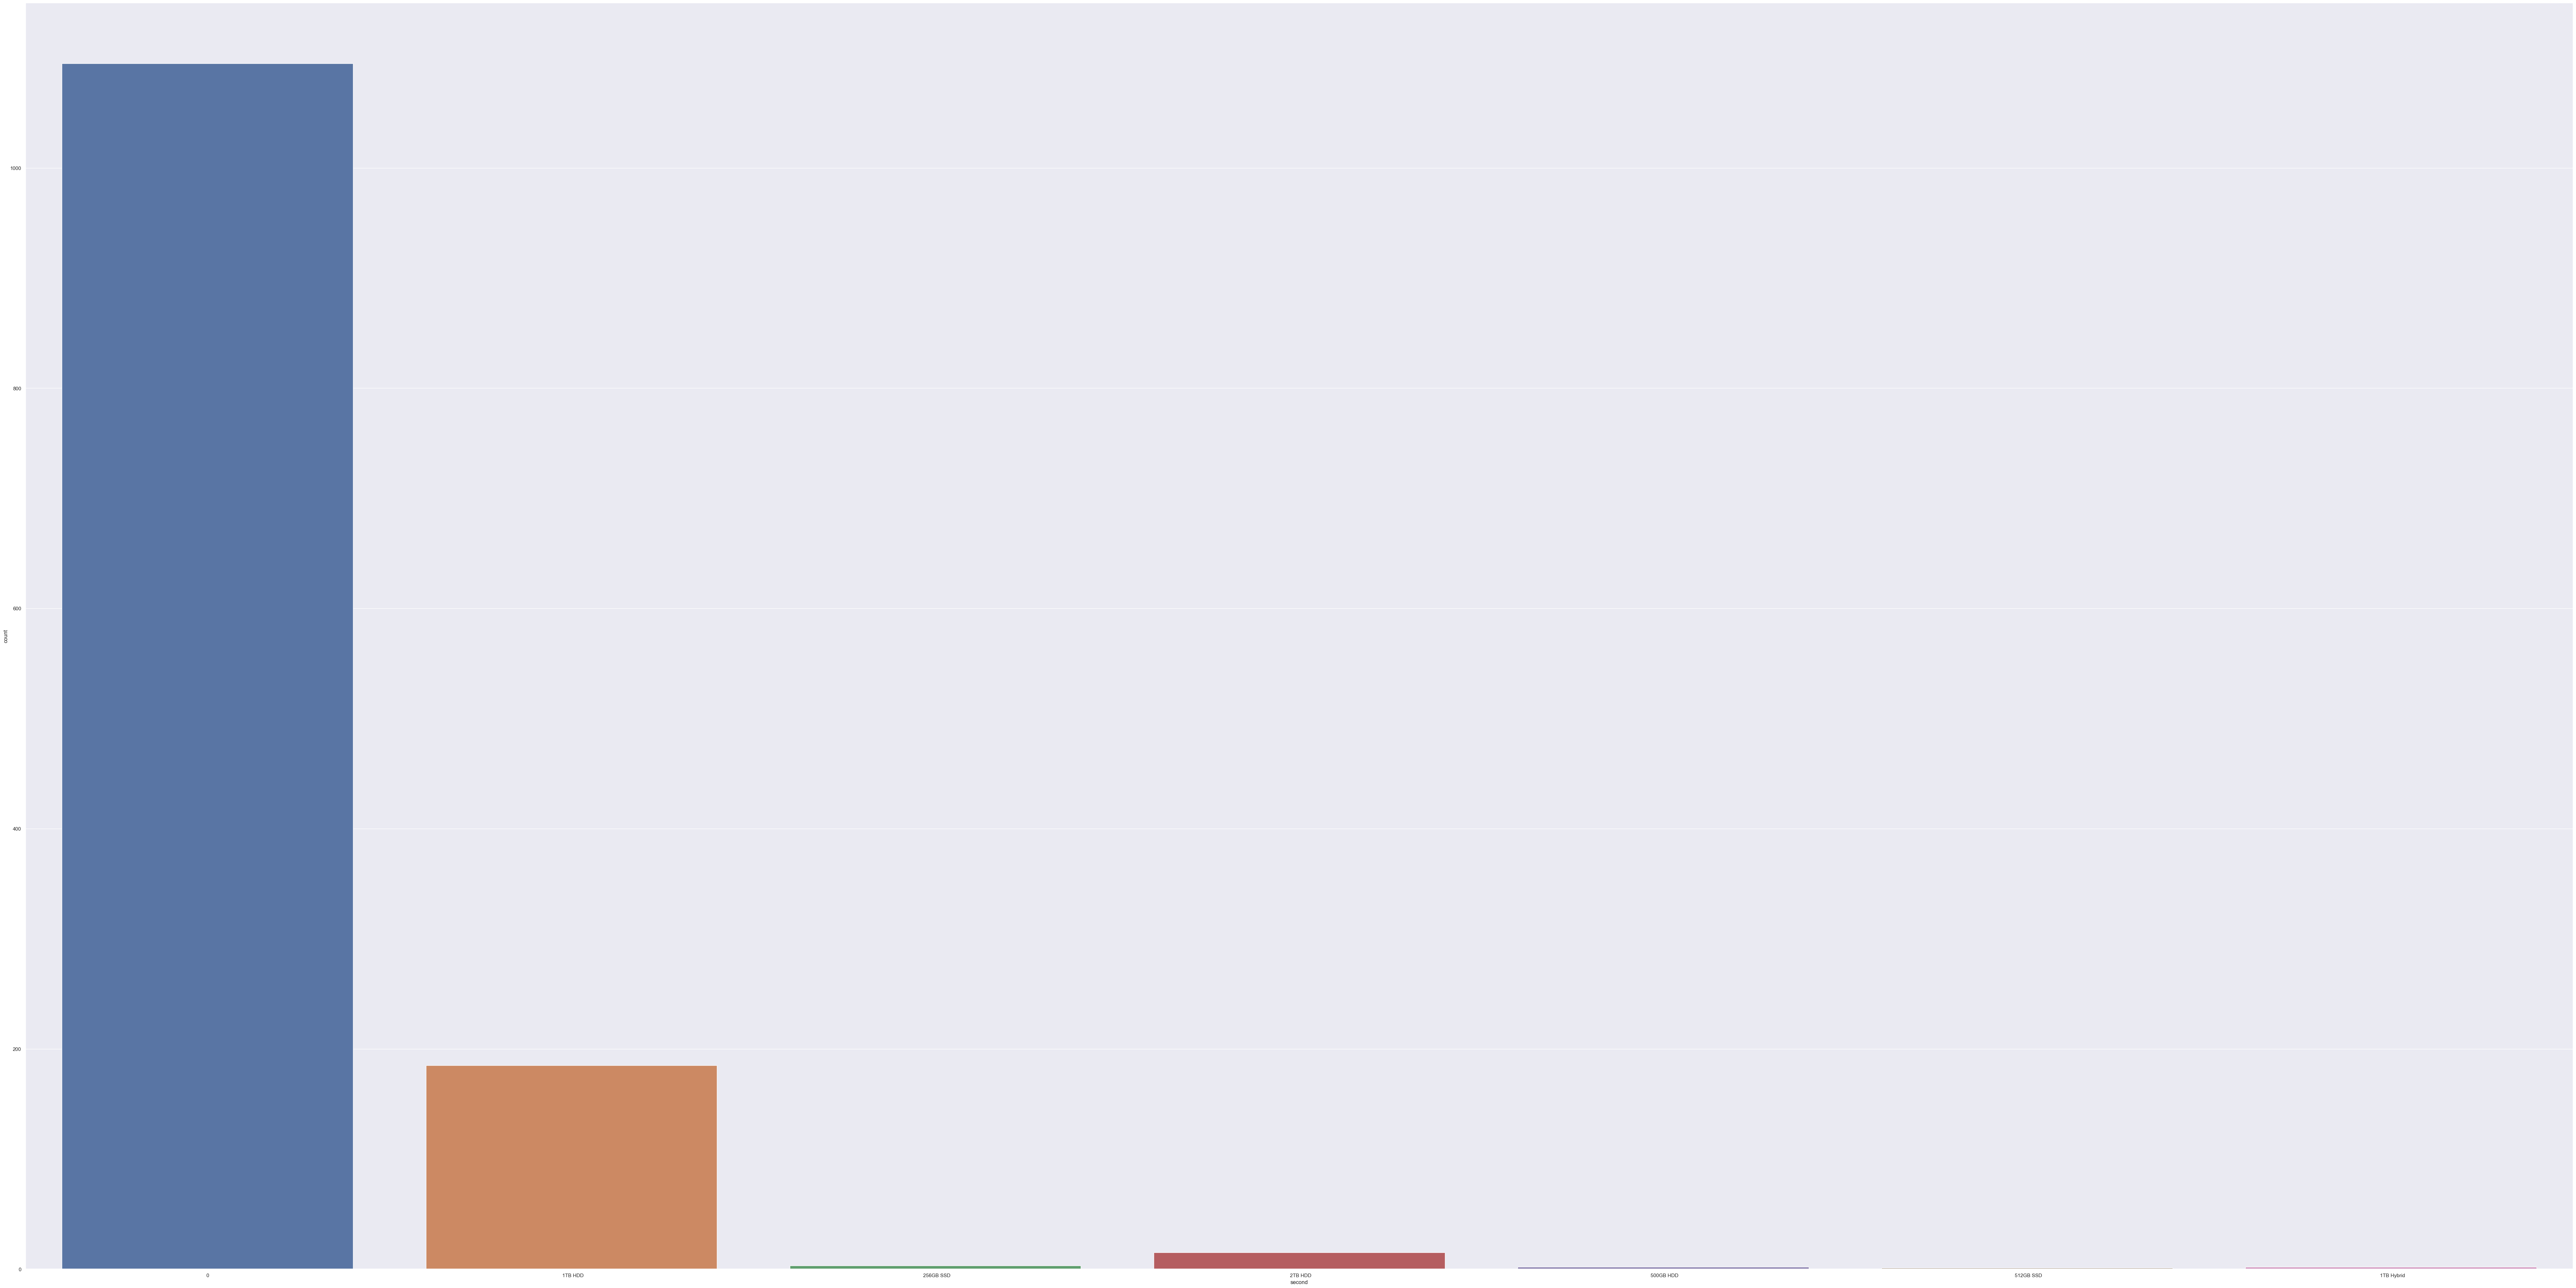

In [70]:
sns.set()
plt.figure(figsize = (100, 50))
sns.countplot(x = 'second', data = df)
plt.show()

'Gpu' column.

In [31]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64